In [2]:
import numpy as np
import matplotlib.pyplot as plt
import successor_features as sf

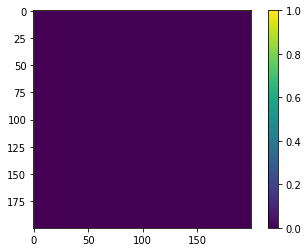

In [3]:
# Initialise an environment
env = sf.Environment('square')
plt.imshow(env.map)
plt.colorbar()

In [6]:
# Generate some BVCs given that environment
bvcs = sf.generate_bvcs(env)

  0%|          | 0/40000 [00:00<?, ?it/s]Building BVC rate maps



AttributeError: 'BVC' object has no attribute 'angular_pref'

In [7]:
# See what the BVCs look like
sf.plot_cells(bvcs)

NameError: name 'bvcs' is not defined

In [5]:
#  Now lets learn an SR - need some behaviour to do that so first lets simulate a trajectory
num_minutes = 120 # number of minutes to run simulation
fps = 50 # sampling rate in Hz
trajectory,direction = env.generate_trajectory(fps*60*num_minutes)

100%|██████████| 359999/359999 [19:47<00:00, 303.28it/s]


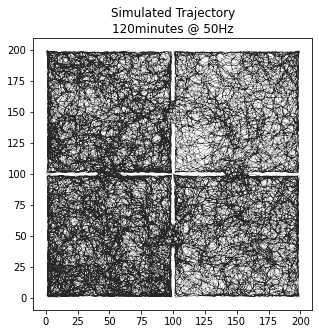

In [6]:
# Check the trajectory looks ok
plt.figure(figsize=(5,5))
ax1 = plt.subplot()
ax1.plot(trajectory[:, 0], trajectory[:, 1], linewidth=.25, alpha=0.85, c='k')
ax1.set_title('Simulated Trajectory\n' + str(num_minutes) + 'minutes @ 50Hz')
plt.show()

In [7]:
# Now we can learn the successor features, initialise the successor matrix to the identity matrix
M = np.eye(len(bvcs))

In [8]:
# Now use the behaviour to learn the SR
M = sf.train_model(bvcs, M, trajectory)

  0%|          | 40/359998 [00:00<15:01, 399.43it/s]
Training BVC-SR model
100%|██████████| 359998/359998 [02:14<00:00, 2681.11it/s]


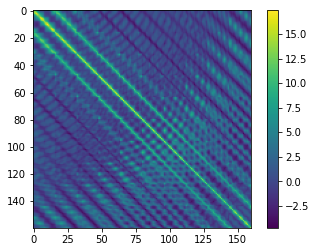

In [9]:
# Check the successor matrix looks sensible (the stripes are from BVCs with similar angular tuning but different distal tuning)
plt.imshow(M)
plt.colorbar()

In [10]:
# Calculate the successor features given the SR matrix
successor_features = sf.calculate_successor_features(bvcs,M)

  9%|▉         | 15/160 [00:00<00:00, 145.16it/s]
Calculating successor features
100%|██████████| 160/160 [00:00<00:00, 192.89it/s]


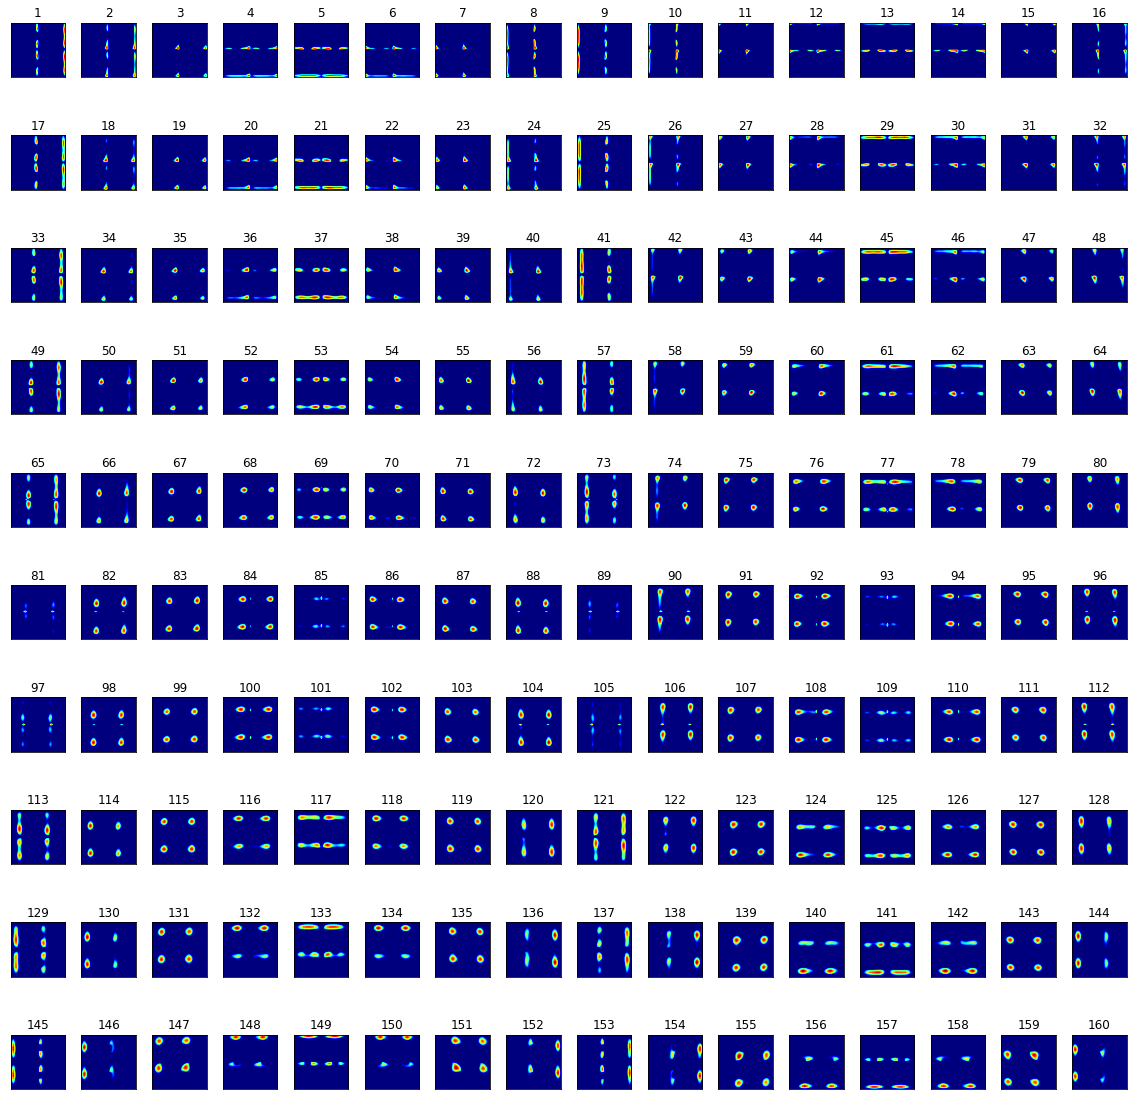

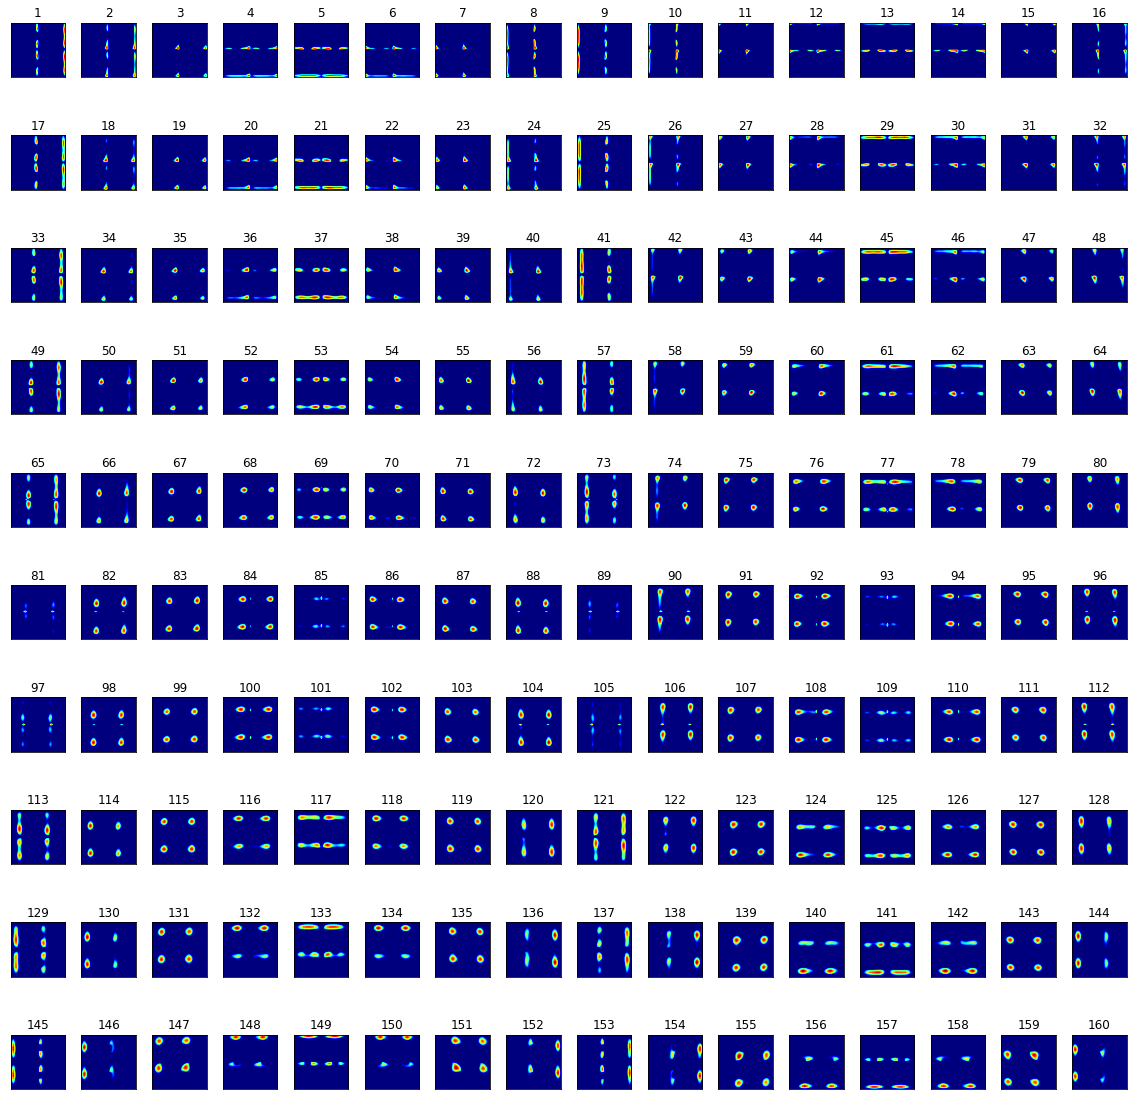

In [11]:
# See what thos features look like
sf.plot_cells(successor_features)

In [12]:
# Also generate the eigenvectors of the successor matrix
successor_eigenvectors = sf.calculate_successor_eigenvectors(bvcs,M)

  1%|          | 1/160 [00:00<00:23,  6.80it/s]
Calculating successor eigenvectors
100%|██████████| 160/160 [00:03<00:00, 44.44it/s]


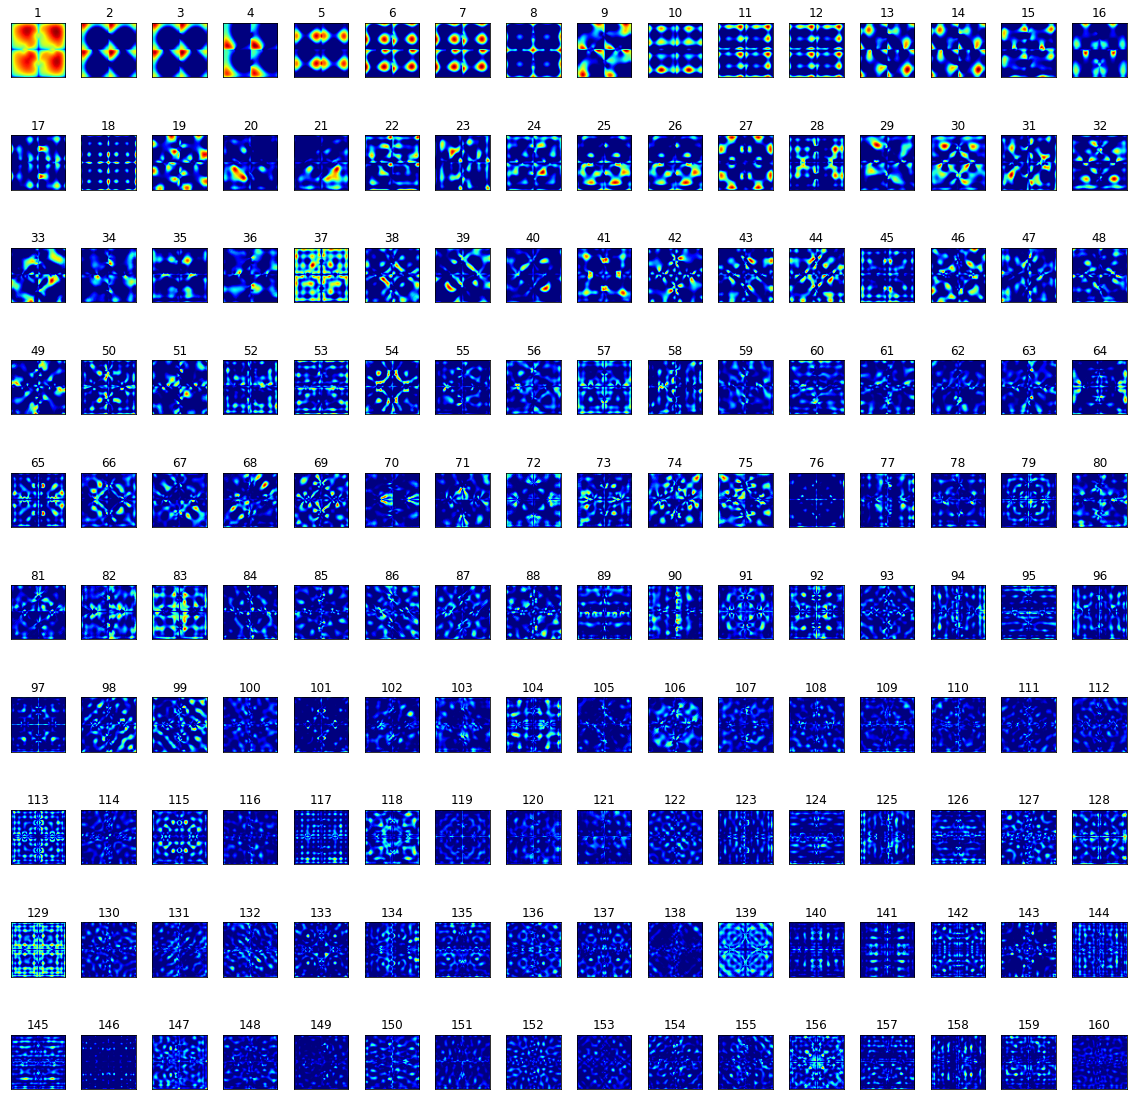

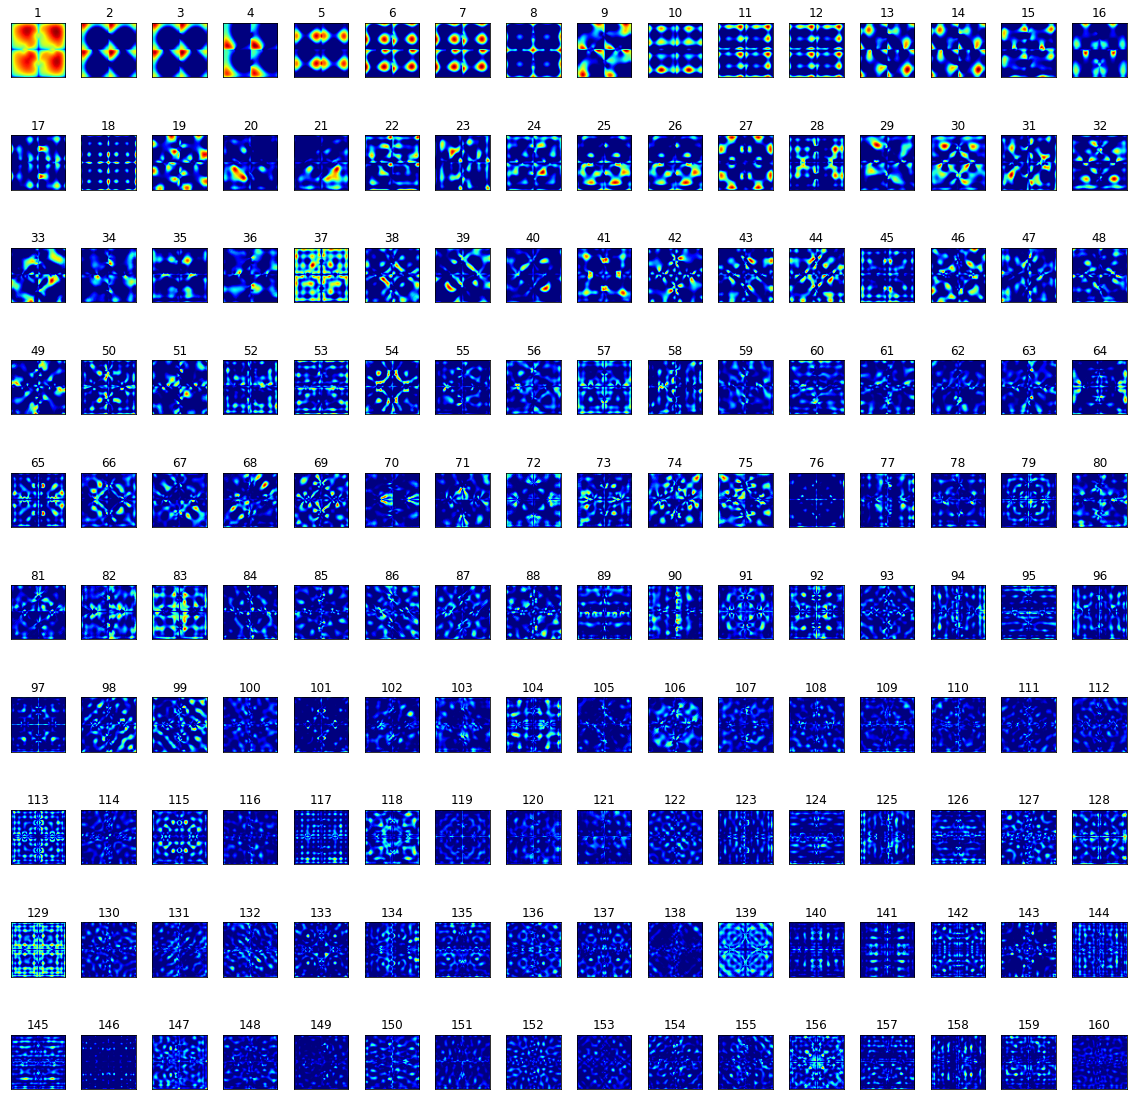

In [13]:
# Plot what they look like too
sf.plot_cells(successor_eigenvectors)